# <center> Week 6 - Python Programming : Numpy continuation <center>
## <center> Saurav <center>

## Classification 
### Gaussian Naive Bayes Classifier

### Load and prepare dataset



In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from IPython.display import display

#load iris dataset
iris = load_iris()

#create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: ' virginica'})

display(iris_df.head())
x = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Split into test and train dataset

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

### Train the GNB classifier


In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

### Make prediction


In [5]:
y_pred = gnb.predict(x_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', ' virginica',
       'versicolor', ' virginica', 'setosa', 'setosa', ' virginica',
       'versicolor', 'setosa', ' virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', ' virginica', 'setosa', ' virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', ' virginica'],
      dtype='<U10')

### Evaluate the model

In [6]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy", accuracy_score(y_test, y_pred))
print("\n Classification Report: \n",)
print(classification_report(y_test, y_pred))

Accuracy 0.9666666666666667

 Classification Report: 

              precision    recall  f1-score   support

   virginica       0.86      1.00      0.92         6
      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



## Clustering Algorithms

- K-means
- MeanShift
- DBSCAN

### K-Means Clustering Algorithms

- Choose the number of clusters(k)
- Initialize Cluster Centers
- Assign Data Points to Clusters
- Update Centroids
- Repeat

In [7]:
import pandas as pd

home_data = pd.read_csv('data/housing.csv',usecols = ['longitude','latitude','median_house_value'])

home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


### Plot Scattered plot to visualize the data

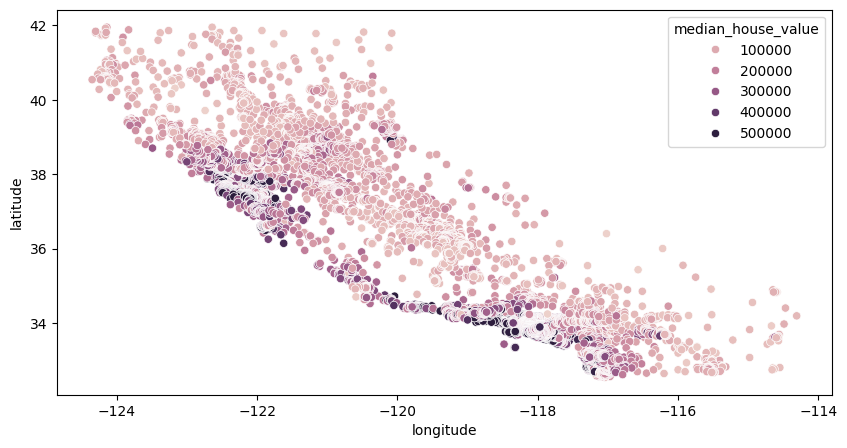

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data = home_data, x='longitude', y='latitude', hue='median_house_value')
plt.show()

## Split Train Test and Normalize Data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude','longitude']], 
                                                     home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

### fit the data into the K-means Model and plot the clusters into Scattered plot

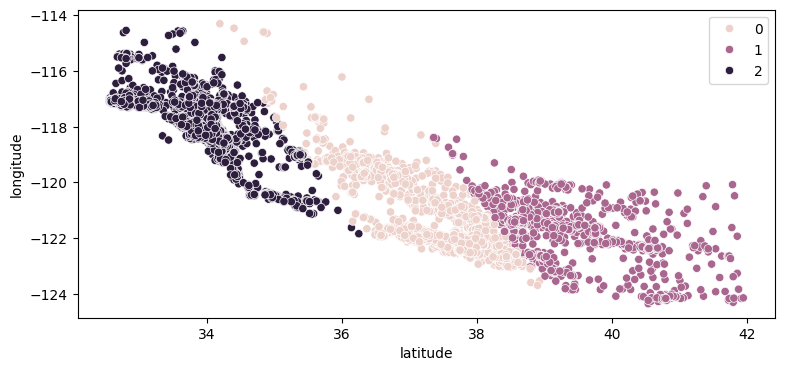

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state =0, n_init='auto')
kmeans.fit(X_train_norm)

plt.figure(figsize=(9,4))
sns.scatterplot(data = X_train, x = 'latitude', y= 'longitude', hue=kmeans.labels_)

plt.show()


### Evaluate Clustering Model using Silhoutee Score (lower score represents a better fit)

In [27]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920703546)

## Confusion Matrix

- Accuracy = (TP+TN)/(TP+FP+TN+FN)
- Precision = TP/(TP+FP)
- Recall = TP/(TP+FN)
- where; T is True ,F is False, P is Positive, and N is Negetive 

# Deep Learning
## Design simple artificial neural network
- 1 input
- 1 hidden layer
- 1 output layer

In [29]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01):
        # initialie network parameters
        self.input_neurons = input_neurons
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.learning_rate = learning_rate

        #Random initialization of weights and biases
        np.random.seed(42)
        self.w1 = np.random.randn(input_neurons, hidden_neurons)
        self.b1 = np.random.randn(hidden_neurons)
        self.w2 = np.random.randn(hidden_neurons, output_neurons)
        self.b2 = np.random.randn(output_neurons)

import